# Homework #5

**See Canvas for this assignment and due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the [class scanning policy](https://docs.google.com/document/d/17y5ksolrn2rEuXYBv_3HeZhkPbYwt48UojNT1OvcB_w/edit?usp=sharing). Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 

### A.1 Justifications for Monte Carlo

Let $X_1,...,X_n \overset{iid}{\sim}N(\mu, \sigma^2)$. Define $S_n^2 = \frac{1}{n-1}\sum^n_{i=1}\left(X_i-\bar{X}\right)^2$.

**A.1 (a) [6 points] Show that $E(S_n^2) = \sigma^2$ and $Var(S_n^2) = \frac{2\sigma^4}{n-1}.$**

HINT: You can use properties of the $\chi^2$ distribution.

\begin{align*}
\frac{(n-1) S_n^2}{\sigma^2} = \frac{1}{\sigma^2}\sum^n_{i=1}\left(X_i-\bar{X}\right)^2 \sim \chi^2(n-1)
\end{align*}

\begin{align*}
 E\left(\frac{(n-1) S_n^2}{\sigma^2}\right) = n-1 \implies  \frac{(n-1)}{\sigma^2}E\left( S_n^2\right) =n-1  \implies E\left( S_n^2\right) = \sigma^2.
\end{align*}

\begin{align*}
Var\left(\frac{(n-1) S_n^2}{\sigma^2}\right) = 2(n-1) \implies  \frac{(n-1)^2}{\sigma^4}Var\left( S_n^2\right) = 2(n-1) \implies Var\left( S_n^2\right) = \frac{2\sigma^4}{n-1}
\end{align*}



Recall from MathStat that a sequence of random variables, $Y_1, Y_2,...$ *converges in probability* to $Y$ if, for every $\epsilon > 0$

\begin{align*}
\lim_{n\to \infty} P\left(|Y_n - Y| \le \epsilon \right) = 1.
\end{align*}

If $Y_n$ converges in probability to $Y$ we write $Y_n \overset{P}{\to} Y$. 

**A.1 (b) [5 points] Show that $S_n^2 \overset{P}{\to} \sigma^2$.**

HINT: You can use a theorem from MathStat related to the bias and variance of $S_n^2$.

Since $S_n^2$ is an unbiased estimator of $\sigma^2$ and its variance goes to zero as $n\to \infty$, $S_n^2 \overset{P}{\to} \sigma^2$.

**A.1 (c) [3 points] Argue that $S_n \overset{P}{\to} \sigma$.**

Again, you can use a theorem from MathStat.

If $Y_n \overset{P}{\to} Y$ and $g$ is a continuous function, then $g(Y_n) \overset{P}{\to} g(Y)$. This result follows directly from part (b) and $g(x) = \sqrt{x}$

Suppose that $\theta_1,...,\theta_m$ are draws from the posterior distribution $\pi(\theta\, | \, \mathbf{y})$, for some data $\mathbf{Y}$. Futher, suppose that the posterior distribution is normal. 

**A.1 (d) [3 points]  Use the above results to come up with a Monte Carlo estimator of the posterior variance, $\sigma^2_1$.**

$$\widehat\sigma_1^2 = \sqrt{\frac{1}{m-1}\sum_{i=1}^m\left(\theta_i - \bar{\theta} \right)^2 },$$

where $ \bar{\theta}$ is the sample mean of the draws.

## A.2 Regression log posterior

Assume that $\mathbf{Y}\, | \, X, \boldsymbol\beta \sim N\left(X\boldsymbol\beta, \Sigma_n\right)$, where:

- $X$ is a $n \times p$ design matrix with columns of predictor measurements ($p = 3$). You can assume that the data have been centered and scaled so that the intercept is zero, and thus, we do not need a column of $1$'s.

- $\boldsymbol{\beta} = (\beta_1, \beta_2, \beta_3)^T$ is a vector of regression parameters.

- $\Sigma_n = \sigma^2I_n$, where $\sigma$ is known.

- $\beta_j \overset{iid}{\sim} N(0,1)$, $j = 1,2,3$. 

**[8 points] Analytically derive the log posterior distribution.**

Let $f(\mathbf{y} \, | \, \boldsymbol\beta,\mathbf{x})$ denote the likelihood function, $\pi(\boldsymbol\beta)$ the prior distribution, and $\pi(\boldsymbol\beta \, | \, \mathbf{y},\mathbf{x})$ denote the posterior distribution. Assuming independence among marginal priors, $\pi(\boldsymbol\beta)$ will be the product of individual standard normals.

\begin{align*}
\log\left( \pi(\boldsymbol\beta \, | \, \mathbf{y},\mathbf{x})\right) \propto \log\left(f(\mathbf{y} \, | \, \boldsymbol\beta,\mathbf{x})\right) + \log\left(\pi(\boldsymbol\beta)\right) = -\frac{1}{2}\sum^n_{i=1}\left(y_i - \mathbf{x}_i^T\boldsymbol\beta \right)^2 - \frac{1}{2}\sum_{j=1}^3\beta_j^2
\end{align*}

where $\mathbf{x}_i$ is the $i^{th}$ row of the design matrix $X$.

## B. Computational Problems

## B.1 Rejection sampling algorithm

Tsutakawa et al. (1985) describe the problem of simultaneously estimating the rates of death from stomach cancer for males at risk in the age bracket 45–64 for the largest cities in Missouri. 

`y`: number of cancer deaths

`n`: number at risk

In the unit #4 code, we developed a Bayesian model for these data. The goal in this problem will be to write your own sampling algorithms. To do so, you should develop the model here as we did in the unit #4 code, e.g., copy in/write functions for the log-posterior on the transformed scale of the parameters.

**B.1 (a) [15 points] In the unit #4 code, we used a function to perform rejection sampling. Here, write your own rejection sampling algorithm that simulates draws of $\boldsymbol\theta = \left(\log\left(\frac{\eta}{1-\eta}\right), \,  \log K \right)^T$ from the posterior distribution in this beta-binomial model. For computational efficiency, you should conduct the acceptance/rejection step on the log scale.**

You can "borrow" functions (e.g., `betabinexch()`) from the Unit #4 code. The first blank code cell below should contain the necessary functions (e.g., `betabinexch()`). The second cell should be a loop that performs rejection sampling.

In [83]:
library(LearnBayes) #install this package if you don't have it.
data(cancermortality)
head(cancermortality)


var(cancermortality$y); 
mle = sum(cancermortality$y)/sum(cancermortality$n); mle

mle*(1-mle)/sum(cancermortality$n)

y,n
0,1083
0,855
2,3461
0,657
1,1208
1,1025


[1] 141.9447

[1] 0.0009933126

[1] 1.388296e-08

In [88]:
betabinexch=function (theta, data)
   {
       eta = exp(theta[1])/(1 + exp(theta[1]))
       K = exp(theta[2])
       y = data[, 1]
       n = data[, 2]
N = length(y)
logf = function(y, n, K, eta) lbeta(K * eta + y, K * (1 -
eta) + n - y) - lbeta(K * eta, K * (1 - eta))
    val = sum(logf(y, n, K, eta))
       val = val + theta[2] - 2 * log(1 + exp(theta[2]))
       return(val)
}


betabinT=function(theta,datapar) #computes values of log(g(theta | x)) - log(p)
   {
   data=datapar$data
   tpar=datapar$par
   d=betabinexch(theta,data)-dmt(theta,mean=c(tpar$m),
     S=tpar$var,df=tpar$df,log=TRUE)
   return(d)
   }

fit=laplace(betabinexch,c(-7,6),cancermortality) #MAP
fit

tpar=list(m=fit$mode,var=2*fit$var,df=4); 
datapar=list(data=cancermortality,par=tpar)

start=c(-6.9,12.4)
fit1=laplace(betabinT,start,datapar) #find the constant d such that log(g(theta | x)) - log(p) <= d
fit1$mode
betabinT(fit1$mode,datapar)

0.07896568,-0.1485087
-0.14850874,1.3483208


[1] -6.888963 12.421993

[1] -569.2829

In [86]:
#rejection sampling
n = 10
dmax = -569.2829

m = 500
yy = rep(NA,n)
zz = matrix(NA,ncol = 2, nrow = m)
for (i in 1:m){
    theta_sim = rmt(n = 1,mean=c(tpar$m), S=tpar$var,df=tpar$df); 
    pp = betabinT(theta_sim,datapar)-dmax; 
    u = runif(1,0,1)
    if (log(u) < pp) {
        zz[i,] = theta_sim
    } else {
        zz[i,] = c(NA,NA)
    }
    yy[i] = log(u) < pp
}
sum(yy)/m

theta = (na.omit(zz))

head(theta)

[1] 0.228

-6.929480,7.417211
-7.080628,7.531364
-6.621855,7.627409
-7.236678,9.706096
-7.097814,7.774154
-7.153513,7.505638


**B.1 (b) [5 points] Use the `mycontour()` function in the `LearnBayes` package to constuct a contour plot of the log posterior distribution. Then, overlay the values of $\boldsymbol\theta$ generated from the rejection sampling algorithm in the previous part.**

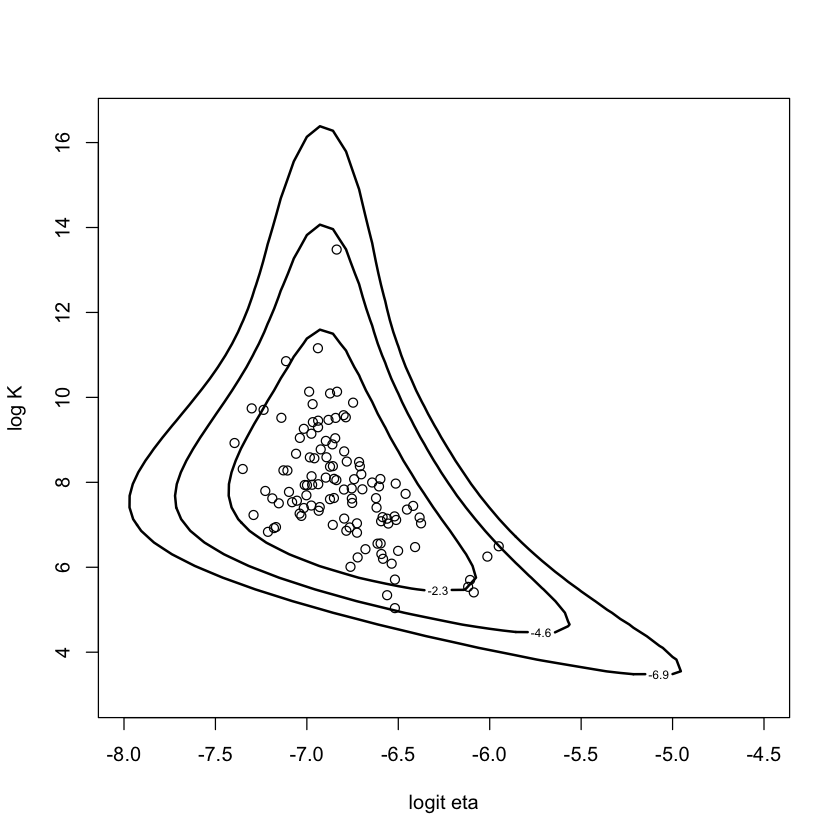

In [87]:
mycontour(betabinexch,c(-8,-4.5,3,16.5),cancermortality,xlab="logit eta",ylab="log K")
points(theta[,1],theta[,2])

**B.1 (c) [4 points] Estimate the mean of $\pi(\eta \, | \, K, y_j, n_j)$.**

In [5]:
eta_hat = mean(1/(1 + exp(-theta[,1]))); eta_hat
#mean(exp(theta[,2]))

[1] 0.001048238

## Problem #2 Bayesian Regression modeling in R continued

The following dataset containts measurements related to the impact of three advertising medias on sales of a product, $P$. The variables are:

- `youtube`($\mathbf{x}_1$): the advertising budget allocated to YouTube. Measured in thousands of dollars;

- `facebook` ($\mathbf{x}_2$): the advertising budget allocated to Facebook. Measured in thousands of dollars; and 

- `newspaper`($\mathbf{x}_3$): the advertising budget allocated to a local newspaper. Measured in thousands of dollars.

- `sales`($\mathbf{Y}$): the value in the $i^{th}$ row of the sales column is a measurement of the sales (in thousands of units) for product $P$ for company $i$.

The advertising data treat "a company selling product $P$" as the statistical unit, and "all companies selling product $P$" as the population. We assume that the $n = 200$ companies in the dataset were chosen at random from the population (a strong assumption!).

In the Unit #4 code, we found the MAP for a simple linear regression on these (standardized) data. Here, let's find the MAP including all of the predictors. 

Assume that $\mathbf{Y}\, | \, X, \boldsymbol\beta \sim N\left(X\boldsymbol\beta, \Sigma_n\right)$, where:

- $X$ is a design matrix with columns of predictor measurements.

- $\boldsymbol{\beta} = (\beta_1, \beta_2, \beta_3)^T$ is a vector of regression parameters.

- $\Sigma_n = \widehat\sigma^2I_n$.

- $\widehat\sigma^2$ is the frequentist estimator of the error variance, $\sigma^2$.

- $\beta_j \sim N(0,1)$, $j = 0,1,2,3$. 

**B.2 (a) Compute the MAP for $\boldsymbol\beta \, | \, \mathbf{Y}$.** 

Use the `laplace()` function; the rest of the problem will be easier. In the first empty cell, write out any R functions that you will need. In the second empty cell, find the MAP.

In [6]:
library(ggplot2)

marketing = read.table(url("https://raw.githubusercontent.com/bzaharatos/-Statistical-Modeling-for-Data-Science-Applications/master/Modern%20Regression%20Analysis%20/Datasets/marketing.txt"), sep = "")
n = dim(marketing)[1]; p = dim(marketing)[2] - 1

#scaling the data 
databar = colMeans(marketing)
XX = scale(marketing);
df = data.frame(XX); head(df)
X = cbind(as.matrix(XX[,1:3])); p = dim(X)[2]; n = dim(X)[1];dim(X)
y = df$sales; 

#frequentist comparison
lmod_full = lm(sales ~ .-1, data = df)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


youtube,facebook,newspaper,sales
0.96742460,0.9790656,1.7744925,1.5481681
-1.19437904,1.0800974,0.6679027,-0.6943038
-1.51235985,1.5246374,1.7790842,-0.9051345
0.05191939,1.2148065,1.2831850,0.8581768
0.39319551,-0.8395070,1.2785934,-0.2151431
-1.61136487,1.7267010,2.0408088,-1.3076295


[1] 200   3

In [55]:
#function that computes the log-posterior up to a constant
log_post = function(beta,data){
    X = as.matrix(data[,1:3]); 
    y = data[,4];
    a = 5; b = 1
    fitted = X%*%beta
    log_lik = -1/2*sum((y - fitted)^2) 
    log_prior = -1/2*sum(beta^2)
    log_post = log_lik + log_prior
    return(log_post)
}


log_post(c(0,0,0),df)

[1] -99.5

In [56]:
#using the LearnBayes laplace() function to compute the MAP
library(LearnBayes)
fit=laplace(log_post,c(0,0,0),df) #MAP
fit
summary(lmod_full)

0.0050228529,-0.0001988555,-0.0002130479
-0.0001988555,0.0057165392,-0.0020029183
-0.0002130479,-0.0020029183,0.0057177030



Call:
lm(formula = sales ~ . - 1, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.69195 -0.17074  0.04634  0.22795  0.54226 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
youtube    0.753066   0.022895  32.892   <2e-16 ***
facebook   0.536482   0.024442  21.949   <2e-16 ***
newspaper -0.004331   0.024444  -0.177     0.86    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3222 on 197 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 573.2 on 3 and 197 DF,  p-value: < 2.2e-16


Now let's try to find the full posterior distribution for $\boldsymbol\beta$ with rejection sampling. We'll use the same proposal distribution as in previous examples, i.e., the multivariate t distribution with parameters `tpar=list(m=t(fit$mode),var=2*fit$var,df=4)` where `fit` is the output of the `laplace()` function.

**B.2 (b) First, write a function that computes values of $\log(g(\boldsymbol\beta | y,n)) - \log(p(\boldsymbol\beta))$, where $g$ is the posterior distribution up to a normalizing constant and $p$ is the proposal distribution.**

In [57]:
logpostT=function(beta,datapar) #computes values of log(g(beta | y,n)) - log(p(beta))
   {
   data=datapar$data
   tpar=datapar$par
   d=log_post(beta,data)-dmt(beta,mean=c(tpar$m),S=tpar$var,df=tpar$df,log=TRUE)
   return(d)
   }

tpar=list(m=t(fit$mode),var=2*fit$var,df=4); #t distribution parameters
datapar=list(data=df,par=tpar) #data parameters

**B.2 (c) Find the constant $d$ such that $\log(g(\boldsymbol\beta | y,n)) - \log(p(\boldsymbol\beta)) \le d$.**

In [58]:
start=c(1,1,1)
fit1=laplace(logpostT,start,datapar) #find the constant d such that log(g(theta | y,n)) - log(theta) <= d
#fit1$mode values that maximize log(g(beta | y,n)) - log(p(beta))
dmax = logpostT(fit1$mode,datapar) #dmax = max of log(g(beta | y,n)) - log(p(beta))
dmax

[1] -14.89648

**B.2(d) [20 points] Perform rejection sampling by two different methods:**

1. using the `rejectsampling()` function in the `LearnBayes` package.

2. Writing your own rejection sampling algorithmm.

In [79]:
m = 10000
theta=rejectsampling(logpostT,tpar,dmax,m,datapar)
dim(theta)

[1] 210   3

In [80]:
#rejection sampling

yy = rep(NA,n)
zz = matrix(NA,ncol = 3, nrow = m)
beta_sim = c(NA,NA,NA)
for (i in 1:m){
    beta_sim = t(rmt(n = 1,mean=c(tpar$m),S=tpar$var,df=tpar$df)); #print(beta_sim)
    pp = logpostT(c(beta_sim[1],beta_sim[2],beta_sim[3]),datapar)-dmax; #print(pp)
    u = runif(1,0,1)
    if (log(u) < pp) {
        zz[i,] = t(beta_sim)
    } else {
        zz[i,] = c(NA,NA,NA)
    }
    yy[i] = log(u) < pp
}
sum(yy)/m

beta = (na.omit(zz))

[1] 0.4166

**B.2 (e) [7 points] Compare your answers using various summaries and visualizations.**

- In the first cell, compare the mean of the rejection sampling draws with the LS estimates.

- In the second cell, construct and comment on histograms of the draws for each $\beta_j$.

- In the third cell, for each $\beta_j$, plot the rejection sampling draws as a function of their index. What do you see?

In [103]:
dim(beta)
colMeans(beta); 
colMeans(theta); 
coef(lmod_full)

[1] 4166    3

[1]  0.747246427  0.533758168 -0.002532207

[1] -6.805531  7.892478

youtube     facebook    newspaper 
 0.753065912  0.536481550 -0.004330686

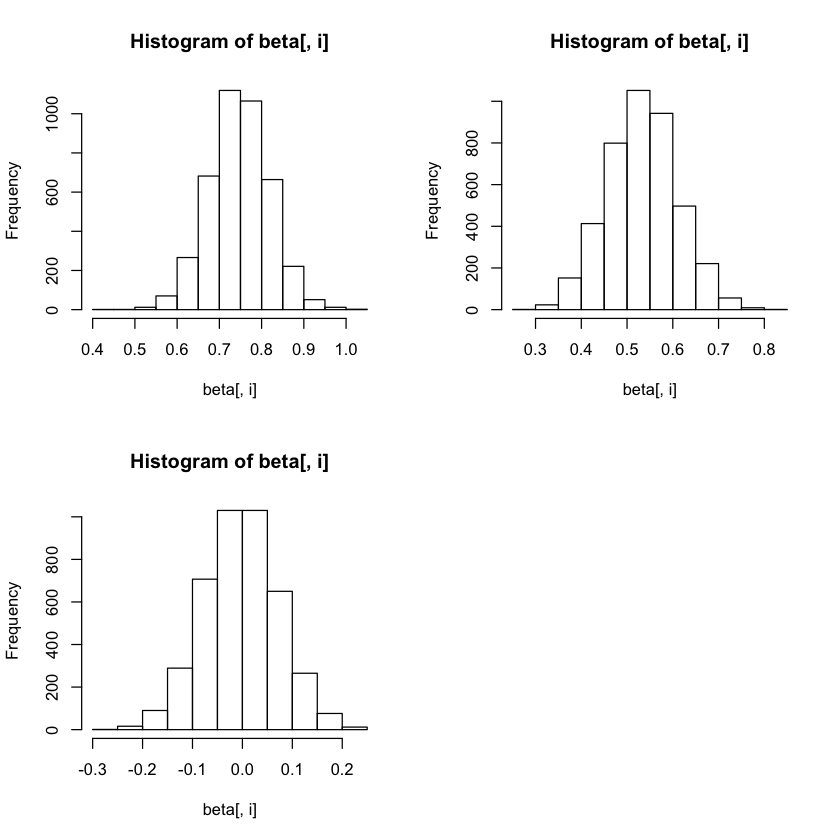

In [102]:
par(mfrow = c(2,2))
for (i in 1:3){
        hist(beta[,i])
}

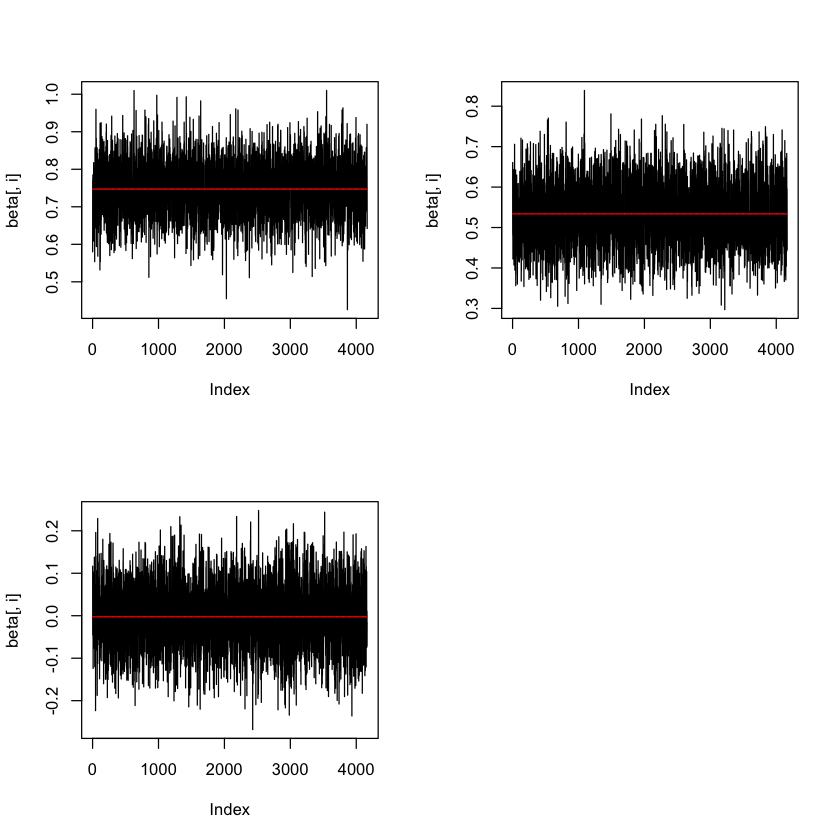

In [100]:
par(mfrow = c(2,2))
for (i in 1:3){
    plot(beta[,i], type = "l")
    lines(rep(mean(beta[,i]), length(beta[,i])), col = "red")
}